# Differenslikninger
Her får du en kort innføring i differenslikninger. Slike likninger kan brukes til diskret modellering, det vil si at vi bruker modeller som benytter seg av verdier ved diskrete tidssteg istedenfor å tilnærme dette med kontinuerlige funksjoner. Kapitlet fungerer også som en repetisjon av de mest grunnleggende programmeringsteknikkene.

```{admonition} Læringsutbytte
Etter å ha arbeidet med denne delen av emnet, skal du kunne:
1. Forklare hva differenslikninger er og hva vi kan bruke dem til.
2. Bruke løkker til å tilnærme problemer på en iterativ måte.
3. Bruke differenslikninger og programmering til å utforske tallmønstre i følger og finne rekkesummer.
4. Modellere biologisk nedbrytning av kjemiske stoffer.
```


Mange prosesser i naturen kan modelleres ved å formulere en sammenheng mellom et system ved tida $t$ og tida $t + \Delta t$. Denne sammenhengen, eller _regelen_, er ofte en prosedyre som skal gjentas mange ganger. Et eksempel er en harepopulasjon som øker med en viss prosent i løpet av tida $\Delta t$ eller en pengesum som står i banken og øker med en viss andel (renta) hvert år. I matematikken har vi også en del sammenhenger der neste tall er avhengig av foregående tall, for eksempel tallfølger.

Siden vi kan ha å gjøre med svært mange ledd i slike prosesser, kan vi få bruk for løkker for å utforske disse prosessene. Siden prosessen inni ei løkke kalles for en _iterasjon_, sier vi at vi løser et problem _iterativt_ når vi repeterer en prosess flere ganger.

Siden vi ikke kjenner tilstanden til systemet ved hvert tidssteg, har vi med en _diskret_ modell å gjøre. Dette står i motsetning til _kontinuerlige_ modeller, der vi kjenner tilstanden ved hvert eneste tidssteg. Egentlig er alle prosesser diskrete på en datamaskin, siden vi ikke kan ha uendelig små tidssteg. Likevel skiller vi på kontinuerlig og diskret på samme måte som i matematikken, selv om forskjellen på datamaskinen egentlig bare er størrelsen mellom verdiene.

I dette kapitlet skal vi se på hvordan vi kan utforske diskrete modeller av dynamiske systemer, og hvordan disse systemene kan beskrives og løses iterativt. Mange av problemene vi skal se på, kan løses analytisk. Men styrken til metodene vi bruker her, er at de også kan benyttes på analytisk uløselige systemer. Du introduseres dermed til en løsningsstrategi som gjør deg i stand til å _tenke iterativt_, altså tenke i stegvise gjentakende operasjoner, i tillegg til å løse problemer med formler og algebra.

Kontinuerlige modeller for systemer som utvikler seg med tid, beskrives ofte av _differensiallikninger_, mens diskrete modeller kan beskrives av _differenslikninger_. Et eksempel på  sammenhenger som kan beskrives som differenslikninger, er mønsteret i tallfølger.

```{admonition} Differenslikninger
En differenslikning er en likning som beskriver forskjellen mellom etterfølgende verdier til en funksjon av diskrete variabler.
```

## Følger og rekker
Ta som eksempel en aritmetisk følge der hvert ledd er 3 større enn det forrige leddet:

$$1, 4, 7, 10, 13, 16, 19, ...$$

Det neste ({n+1}-te) leddet _x_ i denne følgen kan beskrives ut fra det forrige ({n}-te) leddet ved følgende differenslikning:

$$x_{n+1} = x_n + 3$$

Indeksen _n_ står her for det _n_-te elementet av _x_. Dersom vi følger Python-konvensjonen og starter på element nr. 0, blir element nr. 1 (det andre i følgen) lik:

$$x_1 = x_0 + 3 = 1 + 3 = 4$$

Vi kan se at element _k_ i følgen vil bli $x_k = x_0 + 3(n-1) = 1 + 3(n-1)$, men vi kan også finne element _k_ iterativt:

In [1]:
x0 = 1
n = 4
x = x0

for k in range(1,n):
    x = x + 3

print(x)

10


Programmet ovenfor regner ut det fjerde tallet i følgen. Vi ser at programmet benytter er en relativt enkel framgangsmåte, men ofte er hovedutfordringen å formulere regelen som beskriver sammenhengen. Dessuten må vi passe på at vi bruker korrekte indekser.

```{admonition} Underveisoppgave
:class: tip
Finn det hundrede tallet i denne geometriske tallfølgen:

$$1, 2, 4, 8, 16, ...$$
```

Vi kan også summere alle leddene ved å innføre en summevariabel. Med andre ord kan vi finne _rekkesummer_ ved hjelp av iterasjon. Ta for eksempel følgende geometriske rekke:

$$2 + 1 + 1/2 + 1/4 + 1/8 + 1/16 + ...$$

Vi kan formulere denne rekka som en sum av _n_ ledd:

$$\sum_{k=0}^{n-1} 2\cdot\left(\frac{1}{2}\right)^k$$

Slike summeformler er ikke alltid like enkle å formulere. Her ser vi at hvert ledd er halvparten av det andre. Derfor kan vi summere dem iterativt slik:

In [4]:
x0 = 2
n = 3
x = x0
s = x0

for k in range(1,n):
    x = x*0.5
    s = s + x

print(f'Summen av de {n} første leddene er {s}')

Summen av de 3 første leddene er 3.5



```{admonition} Underveisoppgave
:class: tip
Finn summen av de 100 første tallene i følgende rekke:

$1 + \frac{2}{3} + \frac{4}{9} + \frac{8}{27} + ...$
```

På 1800-tallet gikk mange med hatt. Hatteindustrien blomstret, og en fant stadig opp nye metoder som forbedret hattematerialene. En særskilt god – og dårlig, skulle det vise seg – metode, var å bruke kvikksølvnitrat til å stive av hattebremmen i filthatter. Hattemakerne begynte etter hvert å oppleve symptomer som nummenhet, humørsvingninger, muskelspasmer og andre nevrologiske effekter. Noen har til og med blitt beskrevet som gale.

```{figure} https://live.staticflickr.com/4067/4229410034_cdaf994803_c.jpg
---
height: 400px
name: hattemaker
---
Kvikksølv i hatten var ikke særlig lurt.
```

Heldigvis sluttet en å bruke kvikksølv i hattene, men hvor lang tid kan det ta før kvikksølvforgiftningen er ute av kroppen? Tida det tar før halvparten av et stoff mister sin biologiske effekt i kroppen, kalles _biologisk halveringstid_. Det er mange studier på den biologiske halveringstida til uorganisk kvikksølv i hjernen, med estimater fra noen uker til flere år, avhengig av hvordan det blir målt. Mye tyder på at et godt estimat kan være 27.4 år. Det betyr at massen kvikksølv $m_{Hg}$ etter $t$ år kan gis ved:

$$m_{Hg, t+1} = m_{Hg, t}\cdot 0.5^{t/H}$$

Dersom vi sløyfer _t_ i eksponenten, men heller gjentar prosessen for hvert år, kan vi løse dette iterativt:

In [5]:
m0 = 1200 # Startmasse i mg
m = m0    
tid = 100 # Tid i år
H = 27.4  # Halveringstid i år

for t in range(tid):
    m = m*0.5**(1/H)

print(f'Etter {tid} år er det {m:.0f} mg kvikksølv igjen i hjernen')

Etter 100 år er det 96 mg kvikksølv igjen i hjernen


Siden vi har en formel for konsentrasjonen etter tida $t$, trenger vi strengt tatt ikke egentlig å bruke løkker her. Men ved å løse dette iterativt, kan vi lettere ta inn andre faktorer i modellen vår og studere effekten av dem. La oss si at vi etter 12 år finner en medisin som gradvis endrer halveringstida, eller at vi finner ut at noen næringsstoffer gir positiv effekt over tid. Dersom halveringstida endrer seg underveis, _må_ vi faktisk benytte en iterativ modell, spesielt hvis den endrer seg uregelmessig. Her er et eksempel på en enkel modifikasjon:

In [6]:
m0 = 1200           # Startmasse i mg
m = m0    
tid = 100          # Tid i år
H = 27.4           # Halveringstid i år
tid_medisin = 12 # Medisin inntatt ved år

for t in range(tid):
    if t >= tid_medisin:
        H = H*0.98
    m = m*0.5**(1/H)

print(f'Etter {tid} år er det {m:.0f} mg kvikksølv igjen i hjernen')

Etter 100 år er det 2 mg kvikksølv igjen i hjernen


```{admonition} Underveisoppgave
:class: tip
Hva er effekten til medisinen i programmet ovenfor?
```

Den samme framgangsmåten kan brukes på for eksempel radioaktiv halveringstid og akkumulering av miljøgifter i en næringskjede. For radioaktive isotoper er halveringstida konstant, så her har vi ikke så mye igjen for å bruke programmering. Men med for eksempel miljøgifter kan vi dra nytte av at vi kan endre ulike spredningsfaktorer og dermed lage en mer fleksibel og dynamisk modell.

## Medisinakkumulering
Vi kan også bruke iterative metoder til å estimere virkningen av stoffer med fysiologisk effekt, som kosttilskudd, medisiner og gift. Dersom for eksempel 20 \% av en medisin brytes ned i kroppen hver dag, hvor mye medisin har vi i kroppen til enhver tid dersom vi tar 100 mg medisin hver morgen? Programmet nedenfor beregner total mengde medisin i kroppen i løpet av 30 dager:

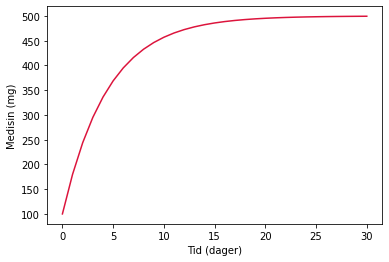

In [7]:
import matplotlib.pyplot as plt

dose = 100
medisin = dose
nedbrytning = 0.80 # Andel medisin igjen i kroppen
tid = 30

t = []
total = []
t.append(0)
total.append(dose)

for i in range(1,tid+1):
    medisin = medisin*nedbrytning + dose
    total.append(medisin)
    t.append(i)
    
plt.plot(t,total,color='crimson')
plt.xlabel('Tid (dager)')
plt.ylabel('Medisin (mg)')
plt.show()

```{admonition} Underveisoppgave
:class: tip
Bivirkninger av medisinen kan oppstå dersom vi får over 350 mg medisin i blodet. Modifiser programmet slik at det finner ut hvor lenge vi kan gå på medisinen dersom vi bruker 100 mg hver dag. Finn også ut hvor mye medisin vi kan ta hver dag uten at vi får bivirkninger.
```

## Videoer

````{tab-set} 
```{tab-item} Differenslikninger
<iframe width="850" height="450" src="https://www.youtube.com/embed/u6wgr0GRoLM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````